<a href="https://colab.research.google.com/github/RezaulKarim-506/research/blob/master/new_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from numpy import array

from keras.preprocessing.text import one_hot, Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, GlobalMaxPooling1D, Embedding, Conv1D, LSTM
from sklearn.model_selection import train_test_split

In [5]:
movie_reviews = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset_for_Bangla_as_text.csv',encoding = "utf-16", sep = "\t")

In [6]:
movie_reviews.shape

(5001, 3)

In [7]:
movie_reviews.head(5)

,Reviews,Feelings,Polarity
0,জমে উঠেছে গ্রুপ বি এর খেলা।,excitement,positive
1,"এখন খেলা হপ্পে, যে দল হারবে সেই দল বাদ পড়ে যাবে",excitement,neutral
2,সব কয়টা সমান,other,neutral
3,সোজা হিসাব যে হারবে সেই বাদ পরবে,sad,positive
4,হিসাব বরবর,other,neutral


In [8]:
movie_reviews.isnull().values.any()

True

In [9]:
movie_reviews

,Reviews,Feelings,Polarity
0,জমে উঠেছে গ্রুপ বি এর খেলা।,excitement,positive
1,"এখন খেলা হপ্পে, যে দল হারবে সেই দল বাদ পড়ে যাবে",excitement,neutral
2,সব কয়টা সমান,other,neutral
3,সোজা হিসাব যে হারবে সেই বাদ পরবে,sad,positive
4,হিসাব বরবর,other,neutral
...,...,...,...
4996,জাতীয় দলে এনে রানের ফোয়াড়া বন্ধ করার জন্য কতৃপ...,sad,positive
4997,যেমন বোলার তেমন ব্যাটসম্যান.....,happy,positive
4998,টেস্ট ও ওডিআই এর জন্য ঠিক আছে।,other,neutral
4999,রানের ফোয়ারা শুধু ঘরোয় পরিবেশেই সম্ভব,happy,negative


In [10]:
movie_reviews=movie_reviews.dropna()

In [11]:
movie_reviews

,Reviews,Feelings,Polarity
0,জমে উঠেছে গ্রুপ বি এর খেলা।,excitement,positive
1,"এখন খেলা হপ্পে, যে দল হারবে সেই দল বাদ পড়ে যাবে",excitement,neutral
2,সব কয়টা সমান,other,neutral
3,সোজা হিসাব যে হারবে সেই বাদ পরবে,sad,positive
4,হিসাব বরবর,other,neutral
...,...,...,...
4995,এত এত হেডলাইন করে লাভ অাছে স্কোয়াডে না নিয়ে,sad,negative
4996,জাতীয় দলে এনে রানের ফোয়াড়া বন্ধ করার জন্য কতৃপ...,sad,positive
4997,যেমন বোলার তেমন ব্যাটসম্যান.....,happy,positive
4998,টেস্ট ও ওডিআই এর জন্য ঠিক আছে।,other,neutral


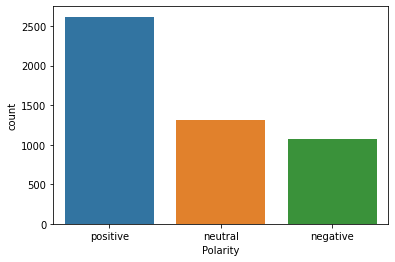

In [12]:
import seaborn as sns
sns.countplot(x='Polarity', data=movie_reviews)

In [13]:
movie_reviews["Reviews"][0]

'জমে উঠেছে গ্রুপ বি এর খেলা।'

In [14]:
import re,json,nltk
def process_comments(Reviews): 
    Reviews = re.sub('[^\u0980-\u09FF]',' ',str(Reviews)) #removing unnecessary punctuation
    return Reviews

In [15]:
# Apply the function into the dataframe
movie_reviews['cleaned'] = movie_reviews['Reviews'].apply(process_comments)  

# print some cleaned reviews from the dataset
sample_data = [10,125,25,854,966,1500,1589,1700,2000,2500,4000,4500]
for i in sample_data:
     print('Original:\n',movie_reviews.Reviews[i],'\nCleaned:\n',
           movie_reviews.cleaned[i],'\n','Sentiment:-- ',movie_reviews.Polarity[i],'\n','Feelings : ',movie_reviews.Feelings[i],'\n')

Original:
 ভাগ্যিস টি-২০ নাইঃ- সোহান 
Cleaned:
 ভাগ্যিস টি ২০ নাইঃ  সোহান 
 Sentiment:--  negative 
 Feelings :  angry 

Original:
 ভাগ্য ভাল শান্ত ব্যাট করে নাই, নইলে পুরো স্টেডিয়াম ধ্বংস হয়ে যেত 
Cleaned:
 ভাগ্য ভাল শান্ত ব্যাট করে নাই  নইলে পুরো স্টেডিয়াম ধ্বংস হয়ে যেত 
 Sentiment:--  positive 
 Feelings :  happy 

Original:
 আাসুক এইবার ভারত মিরপুর পিচ কি ও কত পকার তা বুজাইয়া দিবো। 
Cleaned:
 আাসুক এইবার ভারত মিরপুর পিচ কি ও কত পকার তা বুজাইয়া দিবো  
 Sentiment:--  positive 
 Feelings :  happy 

Original:
 যানজট vhai 
Cleaned:
 যানজট      
 Sentiment:--  neutral 
 Feelings :  other 

Original:
 এটা ডেথ গ্রুপ! 
Cleaned:
 এটা ডেথ গ্রুপ  
 Sentiment:--  neutral 
 Feelings :  sad 

Original:
 সে হিরো যখন ম্যাচ জিতে কোন লাভ হয় না... দলের যখনই প্রয়োজন হয় তখনই সে শূন্যে আউট হয়.... প্রতিটি গুরুত্বপূর্ণ ম্যাচে 
Cleaned:
 সে হিরো যখন ম্যাচ জিতে কোন লাভ হয় না    দলের যখনই প্রয়োজন হয় তখনই সে শূন্যে আউট হয়     প্রতিটি গুরুত্বপূর্ণ ম্যাচে 
 Sentiment:--  positive 
 Feelings :  happy 

Or

<ipython-input-15-28d5fca097e8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_reviews['cleaned'] = movie_reviews['Reviews'].apply(process_comments)


In [16]:
y = movie_reviews['Reviews']

y = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))

In [17]:
X = []
sentences = list(movie_reviews['Reviews'])
for Reviews in sentences:
    X.append(process_comments(Reviews))

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [19]:
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(X_train)

X_train = word_tokenizer.texts_to_sequences(X_train)
X_test = word_tokenizer.texts_to_sequences(X_test)

In [20]:
# Adding 1 to store dimensions for words for which no pretrained word embeddings exist

vocab_length = len(word_tokenizer.word_index) + 1

vocab_length

7873

In [21]:
# Padding all reviews to fixed length 100

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [22]:
# Load GloVe word embeddings and create an Embeddings Dictionary

from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('/content/drive/MyDrive/Colab Notebooks (1)/new/a2_glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [23]:
# Create Embedding Matrix having 100 columns 
# Containing 100-dimensional GloVe word embeddings for all words in our corpus.

embedding_matrix = zeros((vocab_length, 100))
for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [24]:
embedding_matrix.shape

(7873, 100)

In [28]:
from keras.layers import LSTM

In [29]:
# Neural Network architecture

lstm_model = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)

lstm_model.add(embedding_layer)
lstm_model.add(LSTM(128))

lstm_model.add(Dense(1, activation='sigmoid'))

In [30]:
# Model compiling

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(lstm_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          787300    
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 904,677
Trainable params: 117,377
Non-trainable params: 787,300
_________________________________________________________________
None


In [31]:
# Model Training

lstm_model_history = lstm_model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
25/25 [==============================] - 12s 386ms/step - loss: 0.2341 - acc: 1.0000 - val_loss: 5.4326e-05 - val_acc: 1.0000
Epoch 2/6
25/25 [==============================] - 9s 358ms/step - loss: 2.8818e-05 - acc: 1.0000 - val_loss: 1.8793e-05 - val_acc: 1.0000
Epoch 3/6
25/25 [==============================] - 9s 359ms/step - loss: 1.7026e-05 - acc: 1.0000 - val_loss: 1.5807e-05 - val_acc: 1.0000
Epoch 4/6
25/25 [==============================] - 9s 366ms/step - loss: 1.5124e-05 - acc: 1.0000 - val_loss: 1.4446e-05 - val_acc: 1.0000
Epoch 5/6
25/25 [==============================] - 9s 357ms/step - loss: 1.3876e-05 - acc: 1.0000 - val_loss: 1.3274e-05 - val_acc: 1.0000
Epoch 6/6
25/25 [==============================] - 9s 360ms/step - loss: 1.2749e-05 - acc: 1.0000 - val_loss: 1.2197e-05 - val_acc: 1.0000


In [32]:
# Predictions on the Test Set

score = lstm_model.evaluate(X_test, y_test, verbose=1)

32/32 [==============================] - 2s 58ms/step - loss: 1.2197e-05 - acc: 1.0000


In [33]:
# Model Performance

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 1.2196599527669605e-05
Test Accuracy: 1.0


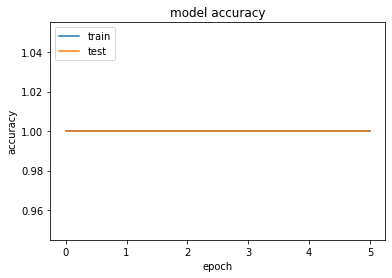

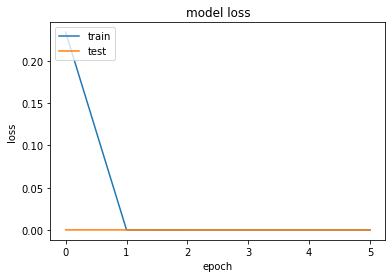

In [34]:
# Model Performance Charts

import matplotlib.pyplot as plt

plt.plot(lstm_model_history.history['acc'])
plt.plot(lstm_model_history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(lstm_model_history.history['loss'])
plt.plot(lstm_model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

CNN Model Training

In [35]:
from keras.layers import Conv1D

In [36]:
# Neural Network architecture

cnn_model = Sequential()

embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
cnn_model.add(embedding_layer)

cnn_model.add(Conv1D(128, 5, activation='relu'))
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Dense(1, activation='sigmoid'))

In [37]:
# Model compiling

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(cnn_model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          787300    
                                                                 
 conv1d (Conv1D)             (None, 96, 128)           64128     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 851,557
Trainable params: 64,257
Non-trainable params: 787,300
_________________________________________________________________
None


In [38]:
# Model training

cnn_model_history = cnn_model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
25/25 [==============================] - 7s 209ms/step - loss: 0.6872 - acc: 1.0000 - val_loss: 0.6807 - val_acc: 1.0000
Epoch 2/6
25/25 [==============================] - 3s 103ms/step - loss: 0.6749 - acc: 1.0000 - val_loss: 0.6685 - val_acc: 1.0000
Epoch 3/6
25/25 [==============================] - 3s 103ms/step - loss: 0.6628 - acc: 1.0000 - val_loss: 0.6566 - val_acc: 1.0000
Epoch 4/6
25/25 [==============================] - 3s 104ms/step - loss: 0.6509 - acc: 1.0000 - val_loss: 0.6448 - val_acc: 1.0000
Epoch 5/6
25/25 [==============================] - 3s 103ms/step - loss: 0.6393 - acc: 1.0000 - val_loss: 0.6333 - val_acc: 1.0000
Epoch 6/6
25/25 [==============================] - 3s 103ms/step - loss: 0.6278 - acc: 1.0000 - val_loss: 0.6220 - val_acc: 1.0000


In [39]:
# Predictions on the Test Set

score = cnn_model.evaluate(X_test, y_test, verbose=1)

32/32 [==============================] - 0s 11ms/step - loss: 0.6220 - acc: 1.0000


In [40]:
# Model Performance

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.6219680905342102
Test Accuracy: 1.0


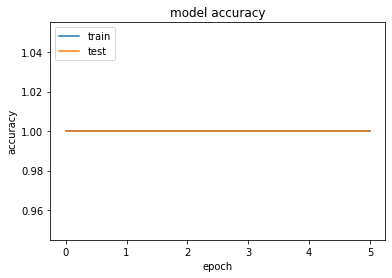

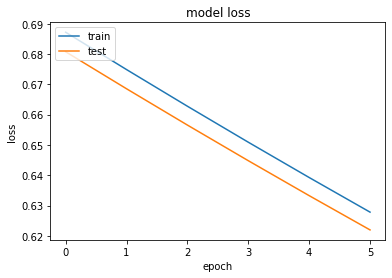

In [41]:
# Model Performance Charts

import matplotlib.pyplot as plt

plt.plot(cnn_model_history.history['acc'])
plt.plot(cnn_model_history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(cnn_model_history.history['loss'])
plt.plot(cnn_model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()